In [20]:
import face_recognition
import os
import numpy as np
import pandas as pd

import sklearn.metrics

import matplotlib.pyplot as plt

In [2]:
def inverted_norm(column): # Higher = 0 lower = 1
    Data_aux = np.array(General_Data[[column]]).flatten()
    Data_aux = np.reshape(Data_aux,[-1,1]).flatten()

    norm_data =1- ( Data_aux - min(Data_aux)) / ( max(Data_aux) - min(Data_aux) )
    return (norm_data)


In [3]:
def face_distance(img1,img2):
    img1 = face_recognition.load_image_file(img1)
    img1_face_encoding = face_recognition.face_encodings(img1,known_face_locations=[(0, 224, 224, 0)])[0]
    known_encodings = [
        img1_face_encoding
        ]

    image_to_test = face_recognition.load_image_file(img2)
    image_to_test_encoding = face_recognition.face_encodings(image_to_test,known_face_locations=[(0, 224, 224, 0)])[0]

    face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)
    return(face_distances[0])

### Read database:

In [4]:
list_dir = os.listdir('C:/Users/Public/Documents/PNAS2018Images/SeparatedImages/')

In [6]:
list_dir = list_dir[1:]

In [9]:
model_result=[]
for i in range(0,40,2):
    model_result.append(face_distance('C:/Users/Public/Documents/PNAS2018Images/CroppedDatabase/' + list_dir[i],'C:/Users/Public/Documents/PNAS2018Images/CroppedDatabase/' + list_dir[i+1]))

In [10]:
# Show the scores
for i in range(len(model_result)):
    print(model_result[i])

0.7420782329251321
0.4724015841952316
0.7419155361978731
0.6546913825716839
0.6053629488125128
0.551599156717194
0.6544334272340916
0.5578512097307496
0.4909899791041852
0.5474700190069205
0.6620889180893269
0.807499086051853
0.5148197511122794
0.4376128030707776
0.5079762037764843
0.5861882909586739
0.6296747534789818
0.5501150180037336
0.49562154414320825
0.4985043372654423


In [11]:
ground_truth = []

for i in range(8):
    ground_truth.append('different') 

for i in range(12):
    ground_truth.append('same')
    


In [18]:
fpr,tpr,thresholds = sklearn.metrics.roc_curve(ground_truth,np.array(model_result),pos_label='different')

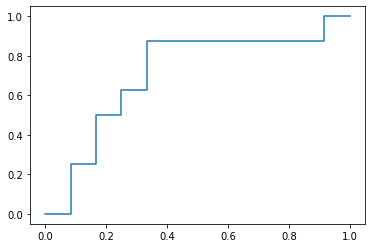

In [21]:
plt.plot(fpr,tpr)

In [22]:
sklearn.metrics.auc(fpr,tpr)

0.7083333333333334